In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Variables

In [80]:
systolic = ctrl.Antecedent(universe = np.arange(70, 190, 1), label = 'Systolic')
diastolic = ctrl.Antecedent(universe = np.arange(40, 100, 1), label = 'Diastolic')
temperature = ctrl.Antecedent(universe = np.arange(98, 106, 1), label = 'temperature')

#to and respiratory rate

health_cond = ctrl.Consequent(universe=np.arange(0,1,0.1), label='health condition', defuzzify_method='centroid')

## Subsets & Membership functions

In [85]:
systolic['low'] = fuzz.trimf(systolic.universe, [70, 80, 90])
systolic['ideal'] = fuzz.trimf(systolic.universe, [80, 100, 120])
systolic['pre-high'] = fuzz.trimf(systolic.universe, [100, 120, 140])
systolic['high'] = fuzz.trimf(systolic.universe, [130, 160, 190])

diastolic['low'] = fuzz.trimf(diastolic.universe, [40, 50, 60])
diastolic['ideal'] = fuzz.trimf(diastolic.universe, [50, 65, 80])
diastolic['pre-high'] = fuzz.trimf(diastolic.universe, [65, 77.5, 90])
diastolic['high'] = fuzz.trimf(diastolic.universe, [80, 90, 100])

temperature['low'] = fuzz.trimf(temperature.universe, [98, 98, 100])
temperature['normal'] = fuzz.trimf(temperature.universe, [98, 100, 102])
temperature['high1'] = fuzz.trimf(temperature.universe, [100, 102, 104])
temperature['high2'] = fuzz.trimf(temperature.universe, [102, 104, 106])
temperature['emergency'] = fuzz.trimf(temperature.universe, [104, 106, 106])

# continue
# health_cond['un-well'] = fuzz.trimf(health_cond.universe, [0,0,0.3])
# health_cond['good'] = fuzz.trimf(health_cond.universe, [0.2,0.4,0.6])
# health_cond['normal']= fuzz.trimf(health_cond.universe, [0.5,0.75,0.8])
# health_cond['worst']= fuzz.trimf(health_cond.universe, [0.7,1,1])

health_cond['excellant'] = fuzz.trapmf(health_cond.universe, [0.0,0.0,0.15,0.25])
health_cond['Good']=fuzz.trapmf(health_cond.universe, [0.15,0.25, 0.45, 0.55])
health_cond['poor']=fuzz.trapmf(health_cond.universe,[0.45, 0.55,0.65,0.75])
health_cond['worst']=fuzz.trapmf(health_cond.universe, [0.65, 0.75, 1.0, 1.0])


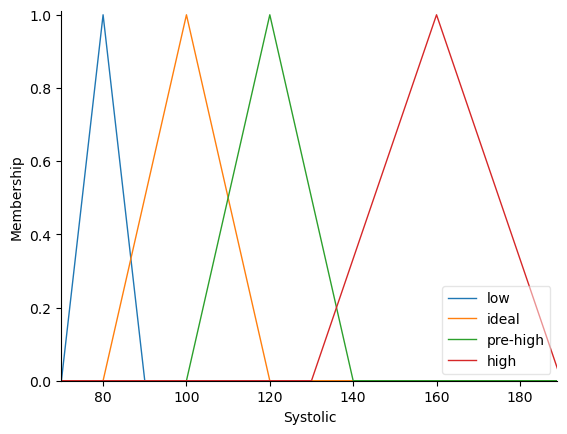

In [79]:
systolic.view()

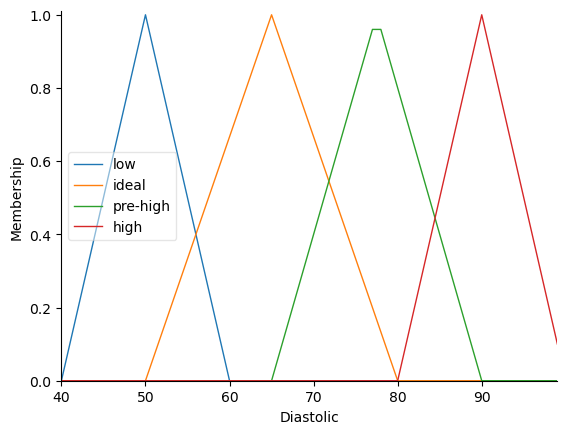

In [86]:
diastolic.view()

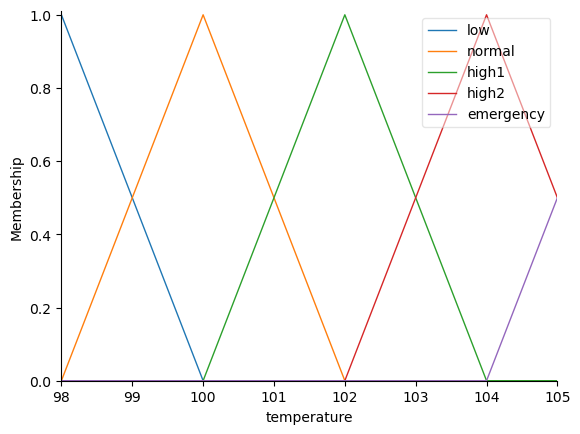

In [9]:
temperature.view()

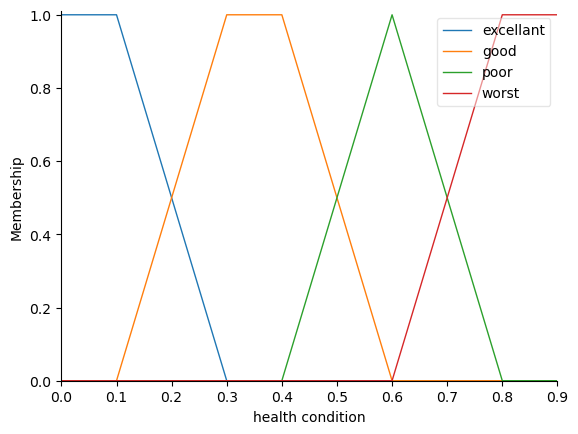

In [65]:
health_cond.view()

## Fuzzy rules

In [67]:
#modified
rule1=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['low'], health_cond['worst'])
rule2=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['normal'], health_cond['poor'])
rule3=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['high1'], health_cond['good'])
rule4=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['high2'], health_cond['good'])
rule5=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['emergency'], health_cond['good'])

rule6=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['low'], health_cond['poor'])
rule7=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['normal'], health_cond['good'])
rule8=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['high1'], health_cond['poor'])
rule9=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['high2'], health_cond['good'])
rule10=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['emergency'], health_cond['worst']) #remove from rule

rule11=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['low'], health_cond['poor'])
rule12=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['normal'], health_cond['poor'])
rule13=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['high1'], health_cond['worst'])
rule14=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['high2'], health_cond['poor'])
rule15=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['emergency'], health_cond['worst'])

rule16=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['low'], health_cond['poor'])
rule17=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['normal'], health_cond['good'])
rule18=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['high1'], health_cond['worst'])
rule19=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['high2'], health_cond['poor'])
rule20=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['emergency'], health_cond['worst'])

rule21=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['low'], health_cond['poor'])
rule22=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['normal'], health_cond['good'])
rule23=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['high1'], health_cond['poor'])
rule24=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['high2'], health_cond['poor'])
rule25=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['emergency'], health_cond['worst'])

#modified
rule26=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'], health_cond['good'])
rule27=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['normal'], health_cond['excellant'])
rule28=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high1'], health_cond['good'])
rule29=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high2'], health_cond['worst'])
rule30=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['emergency'], health_cond['worst'])

rule31=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['low'], health_cond['poor'])
rule32=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['normal'], health_cond['good'])
rule33=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['high1'], health_cond['good'])
rule34=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['high2'], health_cond['poor'])
rule35=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['emergency'], health_cond['worst'])

rule36=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['low'], health_cond['poor'])
rule37=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['normal'], health_cond['good'])
rule38=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['high1'], health_cond['poor'])
rule39=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['high2'], health_cond['worst'])
rule40=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['emergency'], health_cond['worst'])

rule41=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['low'], health_cond['poor'])
rule42=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['normal'], health_cond['good'])
rule43=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['high1'], health_cond['poor'])
rule44=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['high2'], health_cond['worst'])
rule45=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['emergency'], health_cond['worst'])

rule46=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['low'], health_cond['good'])
rule47=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['normal'], health_cond['good'])
rule48=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['high1'], health_cond['poor'])
rule49=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['high2'], health_cond['poor'])
rule50=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['emergency'], health_cond['worst'])

#modified
rule51=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['low'], health_cond['good'])
rule52=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['normal'], health_cond['excellant'])
rule53=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['high1'], health_cond['worst'])
rule54=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['high2'], health_cond['worst'])
rule55=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['emergency'], health_cond['worst'])

rule56=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['low'], health_cond['poor'])
rule57=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['normal'], health_cond['good'])
rule58=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['high1'], health_cond['poor'])
rule59=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['high2'], health_cond['worst'])
rule60=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['emergency'], health_cond['worst'])

rule61=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['low'], health_cond['poor'])
rule62=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['normal'], health_cond['good'])
rule63=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['high1'], health_cond['poor'])
rule64=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['high2'], health_cond['worst'])
rule65=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['emergency'], health_cond['worst'])

rule66=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['low'], health_cond['poor'])
rule67=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['normal'], health_cond['good'])
rule68=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['high1'], health_cond['poor'])
rule69=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['high2'], health_cond['worst'])
rule70=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['emergency'], health_cond['worst'])

rule71=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['low'], health_cond['poor'])
rule72=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['normal'], health_cond['good'])
rule73=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['high1'], health_cond['poor'])
rule74=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['high2'], health_cond['worst'])
rule75=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['emergency'], health_cond['worst'])

#modified
rule76=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['low'], health_cond['excellant'])
rule77=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['normal'], health_cond['worst'])
rule78=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['high1'], health_cond['worst'])
rule79=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['high2'], health_cond['worst'])
rule80=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['emergency'], health_cond['worst']) #removing rules

## Control system creation & simulation

In [68]:
# Mahmoud
control_sys = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,
                                 rule6,rule7,rule8,rule9,rule10,
                                 rule11,rule12,rule13,rule14,rule15,
                                 rule16,rule17,rule18,rule19,rule20,
                                 rule21,rule22,rule23,rule24,rule25,
                                 rule26,rule27,rule28,rule29,rule30,
                                 rule31,rule32,rule34,rule35,rule36,
                                 rule37,rule38,rule39,rule40,rule41,
                                 rule42,rule43,rule45,rule46,rule47,
                                 rule48,rule49,rule50,rule51,rule52,
                                 rule53,rule54,rule56,rule57,rule58,
                                 rule59,rule60,rule61,rule62,rule63,
                                 rule64,rule65,rule66,rule67,rule68,
                                 rule69,rule70,rule71,rule72,rule73,
                                 rule74,rule75,rule76,rule77,rule78,
                                 rule79,rule80])
health = ctrl.ControlSystemSimulation(control_sys)

## Testing

In [76]:
health.input['Systolic'] = 120
health.input['Diastolic'] = 80
health.input['temperature'] = 101
health.compute()
print('health condition', health.output['health condition'])

health condition 0.45
